In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [18]:
df_I10= pd.read_csv('../../datasets/Join_Collection_NSC2_BND_M20.csv')
df_I10.columns

Index(['Unnamed: 0', 'EDC_SBA', 'OPRTN_YN', 'MDCARE_DD_CNT', 'BTH_YYYY',
       'MCARE_RSLT_TYPE', 'VSHSP_DD_CNT', 'EDC_ADD_RT'],
      dtype='object')

### EDA 전략 : 상관관계 확인
- 궁금한 점 : 고혈압환자들의 심결본인부담금에 영향을 끼치는 변수들이 무엇인지 
- 목표 변수 : '심결본인부담금' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인
- 설명 변수 설정 : 
    - 수술 여부 (OPRTN_YN)
    - 입내원일수 (VSHSP_DD_CNT) 
    - 출생년도 (BTH_YYYY)

In [19]:
df_I10_h = df_I10[['OPRTN_YN','VSHSP_DD_CNT','BTH_YYYY']]
df_I10_h

,OPRTN_YN,VSHSP_DD_CNT,BTH_YYYY
0,0,1,1921LE
1,0,2,1921LE
2,0,1,1921LE
3,0,1,1921LE
4,0,1,1921LE
...,...,...,...
4200,0,1,2005
4201,0,1,2005
4202,0,1,2005
4203,0,1,2005


In [20]:
df_I10_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OPRTN_YN      4205 non-null   int64 
 1   VSHSP_DD_CNT  4205 non-null   int64 
 2   BTH_YYYY      4205 non-null   object
dtypes: int64(2), object(1)
memory usage: 98.7+ KB


In [21]:
df_I10_h.isnull().sum()   #데이터 전처리

OPRTN_YN        0
VSHSP_DD_CNT    0
BTH_YYYY        0
dtype: int64

#### 범주형과 연속형(순서형)으로 dtype변형
- BTH_YYYY(출생년도) object -> int형
    - 1920LE를 int형으로 바꾸기 위해서는 LE를 제거하고 '1921'값을 이용해서 분석해야 하는데 그건 정확한 분석이라고 생각하지 않아우선, 1920LE사람들을 제외하고 분석함

In [22]:
df_I10_h.info()   # Dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4205 entries, 0 to 4204
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OPRTN_YN      4205 non-null   int64 
 1   VSHSP_DD_CNT  4205 non-null   int64 
 2   BTH_YYYY      4205 non-null   object
dtypes: int64(2), object(1)
memory usage: 98.7+ KB


In [23]:
df_I10_h = df_I10_h[~df_I10_h["BTH_YYYY"].str.contains("1921LE", case=False)] #LE 있는 데이터 삭제

In [24]:
df_I10_h[:5]  # 12LE 데이터 삭제됨 확인

,OPRTN_YN,VSHSP_DD_CNT,BTH_YYYY
11,0,1,1926
12,0,1,1926
13,0,1,1926
14,0,1,1926
15,0,1,1926


In [25]:
df_I10_h["BTH_YYYY"] = df_I10_h["BTH_YYYY"].astype(int)

C:\Users\82102\AppData\Local\Temp\ipykernel_11820\1182345637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_I10_h["BTH_YYYY"] = df_I10_h["BTH_YYYY"].astype(int)


In [26]:
df_I10_h.info()  # Dtype 변경확인 : int형으로 변경 성공

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 11 to 4204
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OPRTN_YN      4194 non-null   int64
 1   VSHSP_DD_CNT  4194 non-null   int64
 2   BTH_YYYY      4194 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 114.7 KB


In [27]:
df_I10_h.corr() # 상관 계수 계산

,OPRTN_YN,VSHSP_DD_CNT,BTH_YYYY
OPRTN_YN,1.000000,0.030972,0.041659
VSHSP_DD_CNT,0.030972,1.000000,0.028705
BTH_YYYY,0.041659,0.028705,1.000000


### 시각화 확인


#### 변수간에 상관성 확인
- 목표 변수는 정규화 여부 판단
- 목표 변수와 각 설명 변수 간에 관계 확인

In [28]:
df_I10_h.describe().columns.to_list() #연속형 분포도 확인

['OPRTN_YN', 'VSHSP_DD_CNT', 'BTH_YYYY']

#### 연속형 분포도 확인

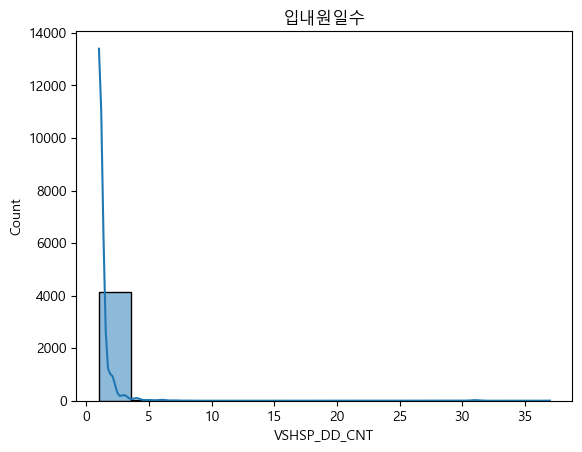

<Figure size 640x480 with 0 Axes>

In [35]:
sns.histplot(df_I10_h['VSHSP_DD_CNT'], kde=True)
plt.title('입내원일수')
plt.show() 
plt.savefig('입내원일수')

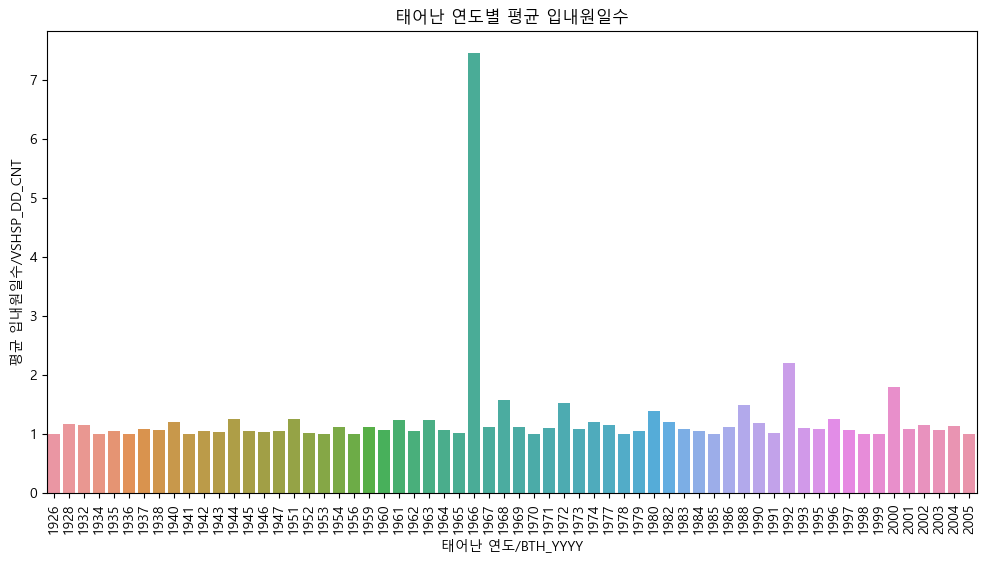

<Figure size 640x480 with 0 Axes>

In [36]:
# 데이터프레임을 'BTH_YYYY' (태어난 연도)로 그룹화하고 'VSHSP_DD_CNT'의 평균을 계산
grouped_data = df_I10_h.groupby('BTH_YYYY')['VSHSP_DD_CNT'].mean().reset_index()

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Seaborn을 사용하여 막대 그래프 생성
sns.barplot(data=grouped_data, x='BTH_YYYY', y='VSHSP_DD_CNT')

# 그래프 제목 설정
plt.title('태어난 연도별 평균 입내원일수')

# x축 레이블 회전하여 가독성 향상
plt.xticks(rotation=90)

# x축과 y축 레이블 추가
plt.xlabel('태어난 연도/BTH_YYYY')
plt.ylabel('평균 입내원일수/VSHSP_DD_CNT')

# 그래프 표시
plt.show()
plt.savefig("태어난 연도별 평균 입내원일수.png")

#### 범주형 분포도 확인

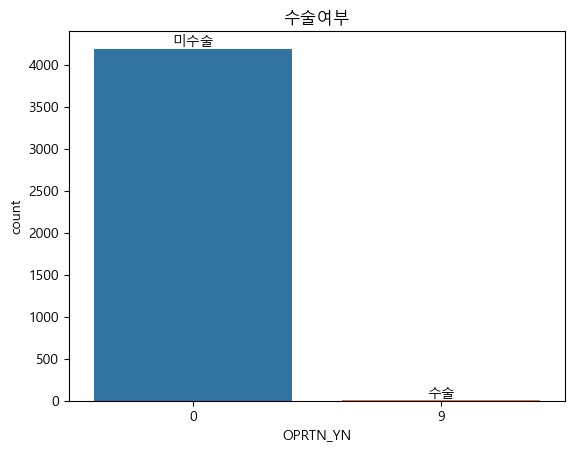

In [15]:
sns.countplot(data=df_I10_h, x='OPRTN_YN')
plt.title('수술여부')
plt.text(0, df_I10_h['OPRTN_YN'].value_counts().loc[0], '미수술', ha='center', va='bottom', fontsize=10)
plt.text(1, df_I10_h['OPRTN_YN'].value_counts().loc[9], '수술', ha='center', va='bottom', fontsize=10)
plt.show()